            Date         Open         High          Low        Close  \
0     1994-01-03   774.109985   777.289978   768.409973   770.760010   
1     1994-01-04   771.429993   774.780029   771.020020   774.280029   
2     1994-01-05   775.229980   778.210022   773.690002   778.049988   
3     1994-01-06   780.359985   781.210022   778.250000   780.409973   
4     1994-01-07   779.289978   783.390015   778.200012   782.940002   
...          ...          ...          ...          ...          ...   
1558  2000-03-06  4935.649902  4980.149902  4887.879883  4904.850098   
1559  2000-03-07  4991.970215  5006.779785  4829.879883  4847.839844   
1560  2000-03-08  4920.859863  4923.140137  4722.140137  4897.259766   
1561  2000-03-09  4913.080078  5047.959961  4857.569824  5046.859863   
1562  2000-03-10  5060.339844  5132.520020  5039.350098  5048.620117   

        Adj Close      Volume  
0      770.760010   253020000  
1      774.280029   298600000  
2      778.049988   349880000  
3      

100%|██████████| 1444/1444 [14:36<00:00,  1.65it/s]


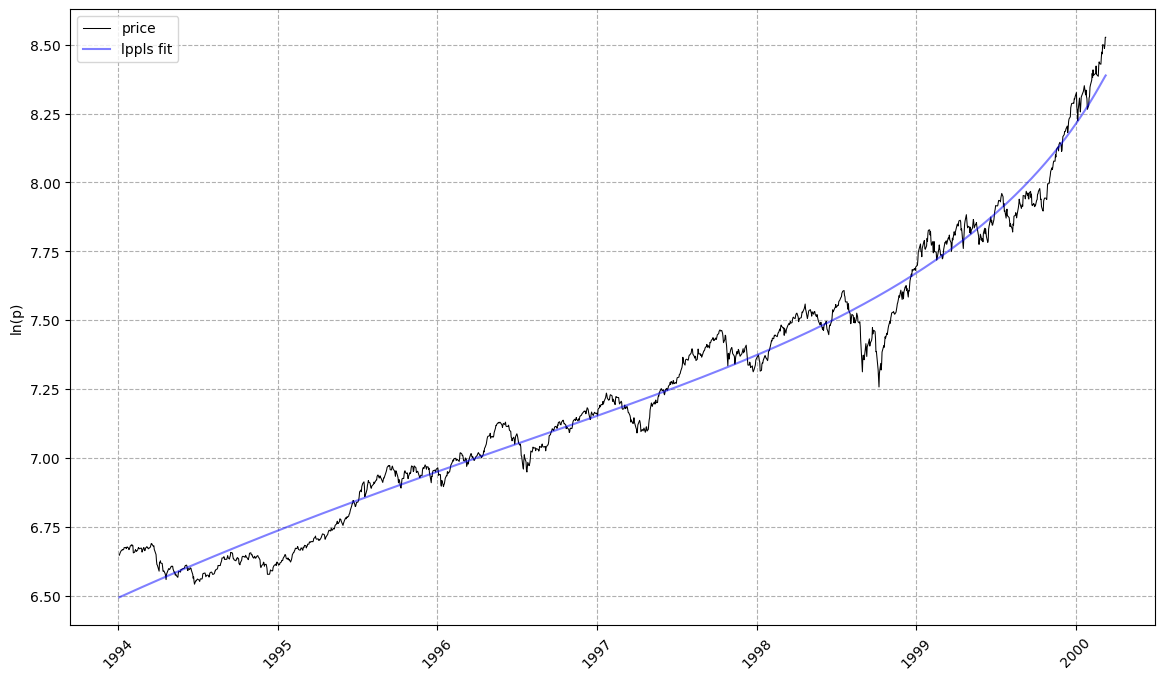

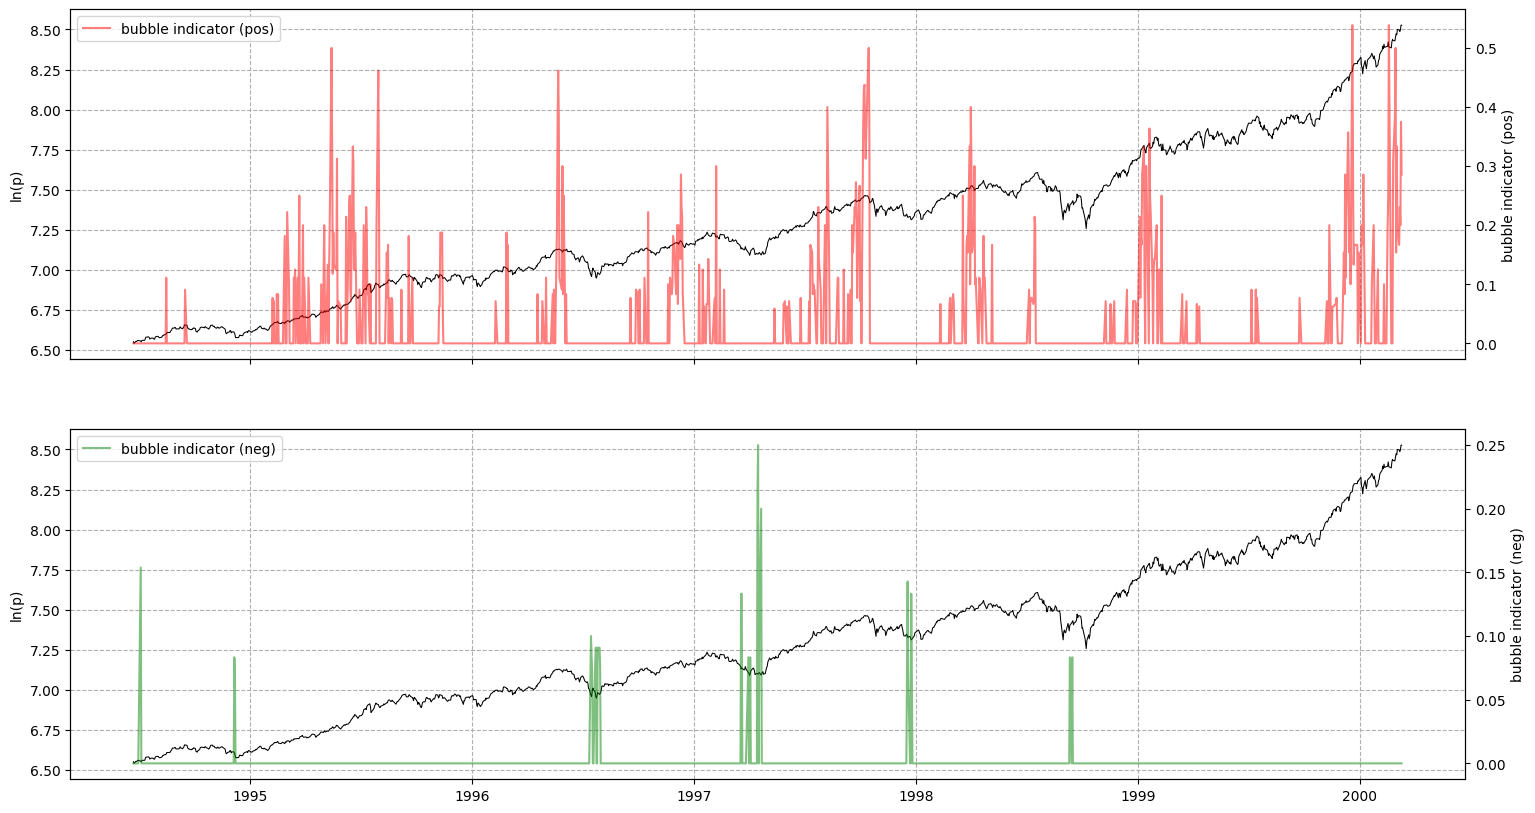

In [1]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
import yfinance as yf
%matplotlib inline

START = '2020-01-1'
END = '2023-12-15'
LOOKBACK = 21 * 6 # 21 days in a trading month


# read example dataset into df 
data = data_loader.nasdaq_dotcom()

print(data)

# convert time to ordinal
time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']]

print(data)

# create list of observation data
price = np.log(data['Adj Close'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# visualize the fit
lppls_model.plot_fit()


# compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=120, 
    smallest_window_size=30, 
    outer_increment=1, 
    inner_increment=5, 
    max_searches=25,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)
# should give a plot like the following...